In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Data Loading

In [2]:
# Load the mnist dataset
df_train = pd.read_csv('./data/mnist_train_small.csv')
df_test = pd.read_csv('./data/mnist_test.csv')

# Rename the columns of the dataset
df_train.columns = ['label'] + [f'pixel_{i}' for i in range(784)]
df_test.columns = ['label'] + [f'pixel_{i}' for i in range(784)]


### Image Visualization

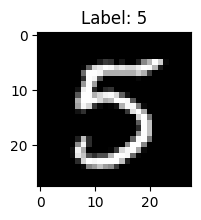

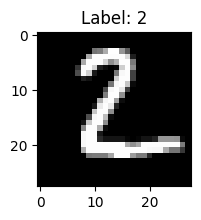

In [3]:
# Function to visualize the image
def visualize_image(df, index):
    plt.imshow(df.iloc[index, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {df.iloc[index, 0]}')
    plt.show()

plt.figure(figsize=(2, 2))
visualize_image(df_train, 0)
plt.figure(figsize=(2, 2))
visualize_image(df_test, 0)


In [4]:
# Split the data into features and labels
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

X_test = df_test.drop('label', axis=1)
y_test = df_test['label']


## Decision Trees


In [5]:
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the labels
y_pred = clf.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')


Accuracy: 0.8448844884488449


parameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Tree Depth:  33


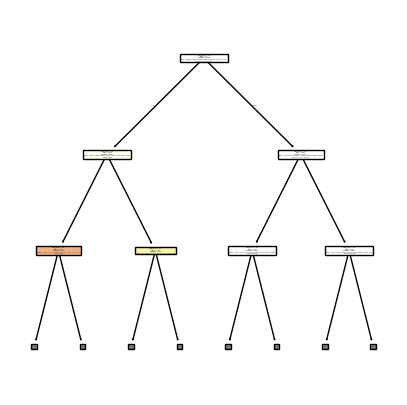

In [6]:
# Print the parameters of the decision tree
print('parameters:\n', clf.get_params())
# Print the depth of the decision tree
print('Tree Depth: ', clf.get_depth())

# visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(5,5))
plot_tree(clf, filled=True, max_depth=2, feature_names=X_train.columns)
plt.show()



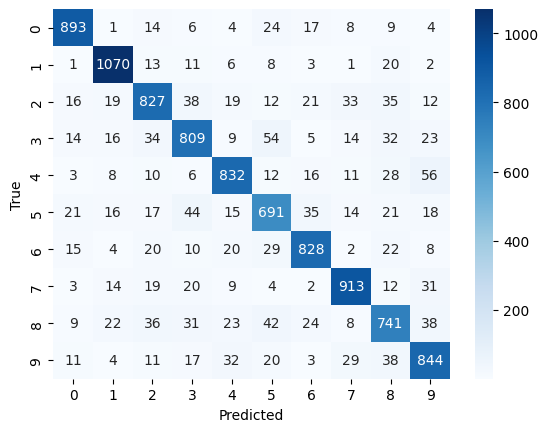

Accuracy: 0.8448844884488449
Precision: 0.8444781622679596
Recall: 0.8448844884488449
F1 Score: 0.8445994990655209
ROC AUC Score: 0.9138881820093426


In [7]:
# Model evaluation
from sklearn.metrics import classification_report

clf_repo = classification_report(y_test, y_pred)

# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# use seaborn to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print (f'Accuracy: {accuracy}')

# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print (f'Precision: {precision}')

# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print (f'Recall: {recall}')

# f1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print (f'F1 Score: {f1}')

# ROC AUC
from sklearn.metrics import roc_auc_score

# Get the probability estimates for each class
y_prob = clf.predict_proba(X_test)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print(f'ROC AUC Score: {roc_auc}')


In [8]:
# # Cross validation
# from sklearn.model_selection import cross_val_score

# # Perform 5-fold cross validation
# scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
# print('Cross-validation scores:', scores)
# # Calculate the average score
# print('Average score:', scores.mean())


In [9]:
# # cart
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [10, 50, 100],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters

# print('Best parameters:', grid_search.best_params_)
# # Print the best score
# print('Best score:', grid_search.best_score_)

# # Get the best model
# best_clf = grid_search.best_estimator_

# # Predict the labels
# y_pred = best_clf.predict(X_test)

# # Calculate the accuracy
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {acc}')


## Emsemble Methods: 
- Bagging, 
- Boosting, 
- Random Forests, 
- Ada Boost


## Dimension Reduction

Accuracy: 0.7893789378937894


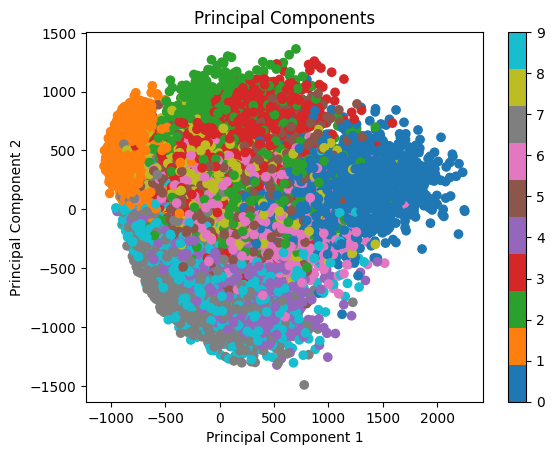

In [10]:
# dimensionality reduction
from sklearn.decomposition import PCA

# Instantiate the PCA class
n_components = 8
pca = PCA(n_components=8)

# Fit the PCA object on the training data
pca.fit(X_train)

# Transform the training data
X_train_pca = pca.transform(X_train)

# Transform the test data
X_test_pca = pca.transform(X_test)

# Fit the decision tree on the transformed training data
clf.fit(X_train_pca, y_train)

# Predict the labels
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

# Plot the principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components')
plt.colorbar()
plt.show()



## Hierarchial Clustering
### dendrogram

In [11]:
# # classification by hierarhical clustering
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import f1_score
# #decision tree
# from sklearn.tree import DecisionTreeClassifier

# # Fit the hierarchical clustering model
# agg = AgglomerativeClustering(n_clusters=10)
# agg.fit(X_train_pca)
# # predict from train data
# y_pred_train = agg.fit_predict(X_train_pca)



In [12]:

# # Fit the decision tree on the transformed training data
# clf = DecisionTreeClassifier()
# clf.fit(y_pred_train.reshape(-1,1), y_train)

# # Predict the labels
# y_pred_without_label = agg.fit_predict(X_test)
# # Predict the labels
# y_pred = clf.predict(y_pred_without_label.reshape(-1,1))

# # Calculate the f1 score
# f1 = f1_score(y_test, y_pred, average='weighted')
# print(f'F1 Score: {f1}')

# # Calculate the accuracy
# acc = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {acc}')


In [13]:

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # use seaborn to plot the confusion matrix
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Dendrogram
# from scipy.cluster.hierarchy import dendrogram, linkage

# # Create the linkage matrix
# Z = linkage(X_train, 'ward')

# # Plot the dendrogram
# plt.figure(figsize=(25, 10))
# dendrogram(Z)
# plt.show()


Accuracy: 0.9383938393839384
parameters:
 {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


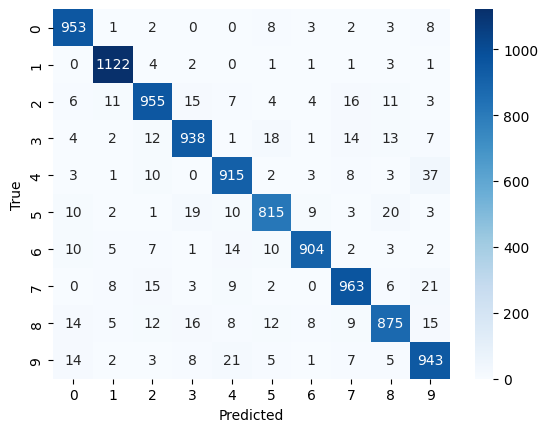

In [19]:
# MLP
from sklearn.neural_network import MLPClassifier

# Instantiate the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Fit the model
mlp.fit(X_train, y_train)

# Predict the labels
y_pred = mlp.predict(X_test)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

# Print the parameters of the MLP
print('parameters:\n', mlp.get_params())

# Model evaluation
from sklearn.metrics import classification_report

mlp_repo = classification_report(y_test, y_pred)

# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
# use seaborn to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
